<a href="https://colab.research.google.com/github/NicoloAvesani/social_research/blob/main/Copia_di_immigration_to_italy.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [164]:
# social research project

https://www.kaggle.com/datasets/luigigno/italy-immigration-data-by-the-un

In [165]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb

In [166]:
italy_imm_data = pd.read_excel('Italy.xlsx')

In [167]:
italy_imm_data.head()

,Type,Coverage,OdName,AREA,AreaName,REG,RegName,DEV,DevName,1980,...,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013
0,Emigrants,Foreigners,Afghanistan,935,Asia,5501,Southern Asia,902,Developing regions,..,...,1,0,1,0,8,11,13,14,8,19
1,Emigrants,Foreigners,Albania,908,Europe,925,Southern Europe,901,Developed regions,..,...,674,929,910,836,925,1110,1495,1525,1794,2296
2,Emigrants,Foreigners,Algeria,903,Africa,912,Northern Africa,902,Developing regions,..,...,104,82,81,75,127,149,152,165,140,159
3,Emigrants,Foreigners,Andorra,908,Europe,925,Southern Europe,901,Developed regions,..,...,0,0,2,3,2,3,0,0,2,4
4,Emigrants,Foreigners,Angola,903,Africa,911,Middle Africa,902,Developing regions,..,...,12,10,12,4,7,9,35,7,11,22


In [168]:
italy_imm_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 388 entries, 0 to 387
Data columns (total 43 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Type      388 non-null    object
 1   Coverage  388 non-null    object
 2   OdName    388 non-null    object
 3   AREA      388 non-null    int64 
 4   AreaName  388 non-null    object
 5   REG       388 non-null    int64 
 6   RegName   388 non-null    object
 7   DEV       388 non-null    int64 
 8   DevName   388 non-null    object
 9   1980      388 non-null    object
 10  1981      388 non-null    object
 11  1982      388 non-null    object
 12  1983      388 non-null    object
 13  1984      388 non-null    object
 14  1985      388 non-null    object
 15  1986      388 non-null    object
 16  1987      388 non-null    object
 17  1988      388 non-null    object
 18  1989      388 non-null    object
 19  1990      388 non-null    object
 20  1991      388 non-null    object
 21  1992      388 no

In [169]:
italy_imm_data.replace(['..'],0, inplace = True)

In [170]:
italy_imm_data = italy_imm_data[italy_imm_data['Type'] == 'Immigrants']
italy_imm_data = italy_imm_data.drop(italy_imm_data.index[-2:])
italy_imm_data

,Type,Coverage,OdName,AREA,AreaName,REG,RegName,DEV,DevName,1980,...,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013
192,Immigrants,Foreigners,Afghanistan,935,Asia,5501,Southern Asia,902,Developing regions,0,...,64,145,171,856,1175,1017,694,847,1109,1147
193,Immigrants,Foreigners,Albania,908,Europe,925,Southern Europe,901,Developed regions,0,...,38807,28358,23099,23292,35715,27493,22591,16613,14118,12165
194,Immigrants,Foreigners,Algeria,903,Africa,912,Northern Africa,902,Developing regions,0,...,2892,1190,976,920,1376,1132,1199,1089,944,935
195,Immigrants,Foreigners,Andorra,908,Europe,925,Southern Europe,901,Developed regions,0,...,15,3,5,4,13,13,7,3,4,1
196,Immigrants,Foreigners,Angola,903,Africa,911,Middle Africa,902,Developing regions,0,...,98,80,76,45,85,83,78,69,91,64
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
381,Immigrants,Foreigners,Venezuela (Bolivarian Republic of),904,Latin America and the Caribbean,931,South America,902,Developing regions,0,...,828,805,627,790,848,704,802,738,584,528
382,Immigrants,Foreigners,Viet Nam,935,Asia,920,South-Eastern Asia,902,Developing regions,0,...,58,136,183,272,326,301,306,230,141,159
383,Immigrants,Foreigners,Yemen,935,Asia,922,Western Asia,902,Developing regions,0,...,26,21,24,19,26,26,18,16,8,21
384,Immigrants,Foreigners,Zambia,903,Africa,910,Eastern Africa,902,Developing regions,0,...,19,31,28,11,25,18,17,23,12,15


In [171]:
italy_imm_data.rename(columns={'OdName':'Country'}, inplace=True)

In [172]:
italy_imm_data['Country'].unique()

array(['Afghanistan', 'Albania', 'Algeria', 'Andorra', 'Angola',
       'Antigua and Barbuda', 'Argentina', 'Armenia', 'Australia',
       'Austria', 'Azerbaijan', 'Bahamas', 'Bahrain', 'Bangladesh',
       'Barbados', 'Belarus', 'Belgium', 'Belize', 'Benin', 'Bhutan',
       'Bolivia (Plurinational State of)', 'Bosnia and Herzegovina',
       'Botswana', 'Brazil', 'Brunei Darussalam', 'Bulgaria',
       'Burkina Faso', 'Burundi', 'Cabo Verde', 'Cambodia', 'Cameroon',
       'Canada', 'Central African Republic', 'Chad', 'Chile', 'China',
       'Colombia', 'Comoros', 'Congo', 'Costa Rica', "Côte d'Ivoire",
       'Croatia', 'Cuba', 'Cyprus', 'Czech Republic',
       "Democratic People's Republic of Korea",
       'Democratic Republic of the Congo', 'Denmark', 'Djibouti',
       'Dominica', 'Dominican Republic', 'Ecuador', 'Egypt',
       'El Salvador', 'Equatorial Guinea', 'Eritrea', 'Estonia',
       'Ethiopia', 'Fiji', 'Finland', 'France', 'Gabon', 'Gambia',
       'Georgia', 'German

In [173]:
# since there is ITALY as country of departure, we have to remove it

italy_imm_data = italy_imm_data[italy_imm_data.Country != 'Italy']
italy_imm_data

,Type,Coverage,Country,AREA,AreaName,REG,RegName,DEV,DevName,1980,...,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013
192,Immigrants,Foreigners,Afghanistan,935,Asia,5501,Southern Asia,902,Developing regions,0,...,64,145,171,856,1175,1017,694,847,1109,1147
193,Immigrants,Foreigners,Albania,908,Europe,925,Southern Europe,901,Developed regions,0,...,38807,28358,23099,23292,35715,27493,22591,16613,14118,12165
194,Immigrants,Foreigners,Algeria,903,Africa,912,Northern Africa,902,Developing regions,0,...,2892,1190,976,920,1376,1132,1199,1089,944,935
195,Immigrants,Foreigners,Andorra,908,Europe,925,Southern Europe,901,Developed regions,0,...,15,3,5,4,13,13,7,3,4,1
196,Immigrants,Foreigners,Angola,903,Africa,911,Middle Africa,902,Developing regions,0,...,98,80,76,45,85,83,78,69,91,64
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
381,Immigrants,Foreigners,Venezuela (Bolivarian Republic of),904,Latin America and the Caribbean,931,South America,902,Developing regions,0,...,828,805,627,790,848,704,802,738,584,528
382,Immigrants,Foreigners,Viet Nam,935,Asia,920,South-Eastern Asia,902,Developing regions,0,...,58,136,183,272,326,301,306,230,141,159
383,Immigrants,Foreigners,Yemen,935,Asia,922,Western Asia,902,Developing regions,0,...,26,21,24,19,26,26,18,16,8,21
384,Immigrants,Foreigners,Zambia,903,Africa,910,Eastern Africa,902,Developing regions,0,...,19,31,28,11,25,18,17,23,12,15


In [174]:
italy_imm_data[1995]

192       0
193    3411
194       0
195       0
196       0
       ... 
381     280
382       0
383       0
384       0
385       0
Name: 1995, Length: 193, dtype: int64

In [175]:
italy_mask = italy_imm_data['Country'] == 'Italy'
italy_imm_data[italy_mask]

,Type,Coverage,Country,AREA,AreaName,REG,RegName,DEV,DevName,1980,...,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013


In [176]:
# there are 3 columns 'AREA','REG','DEV' that are not useful, as they represent code--> drop them

italy_imm_data = italy_imm_data.drop(['AREA', 'REG', 'DEV'], axis=1)

In [177]:
# since I want to understand the total number of migrants from every country, I add the 'Total' column
italy_imm_data['Total'] = italy_imm_data.sum(axis=1)

<ipython-input-177-5091f58cbcfa>:2: FutureWarning:

Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.



In [178]:
italy_imm_data.columns

Index([    'Type', 'Coverage',  'Country', 'AreaName',  'RegName',  'DevName',
             1980,       1981,       1982,       1983,       1984,       1985,
             1986,       1987,       1988,       1989,       1990,       1991,
             1992,       1993,       1994,       1995,       1996,       1997,
             1998,       1999,       2000,       2001,       2002,       2003,
             2004,       2005,       2006,       2007,       2008,       2009,
             2010,       2011,       2012,       2013,    'Total'],
      dtype='object')

In [179]:
italy_imm_data = italy_imm_data.drop(columns = [1980,       1981,       1982,       1983,       1984,       1985,
             1986,       1987,       1988,       1989,       1990,       1991,
             1992,       1993,       1994,     2001,])

In [180]:
df_sorted = italy_imm_data.sort_values(by='Total', ascending=False)

In [181]:
df_sorted

,Type,Coverage,Country,AreaName,RegName,DevName,1995,1996,1997,1998,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,Total
332,Immigrants,Foreigners,Romania,Europe,Eastern Europe,Developed regions,2321,6701,6755,6818,...,45338,39715,271443,174554,105597,92116,90096,81666,58227,1172278
307,Immigrants,Foreigners,Morocco,Africa,Northern Africa,Developing regions,4937,22289,14957,12816,...,26057,21784,23483,37275,33128,29960,23885,19590,19568,446187
193,Immigrants,Foreigners,Albania,Europe,Southern Europe,Developed regions,3411,20508,15009,19813,...,28358,23099,23292,35715,27493,22591,16613,14118,12165,435426
373,Immigrants,Foreigners,Ukraine,Europe,Eastern Europe,Developed regions,161,430,436,741,...,15675,14821,15487,24039,22594,30416,17889,11510,12814,253865
227,Immigrants,Foreigners,China,Asia,Eastern Asia,Developing regions,1448,4500,7305,0,...,14732,13579,9719,12791,16843,22866,20055,20463,17592,205332
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
281,Immigrants,Foreigners,Kiribati,Oceania,Micronesia,Developing regions,0,0,0,0,...,1,0,1,0,2,0,0,1,0,7
349,Immigrants,Foreigners,Solomon Islands,Oceania,Melanesia,Developing regions,0,0,0,0,...,0,0,0,2,1,0,0,1,0,5
303,Immigrants,Foreigners,Micronesia (Federated States of),Oceania,Micronesia,Developing regions,0,0,0,0,...,0,0,4,0,0,0,0,0,0,4
371,Immigrants,Foreigners,Tuvalu,Oceania,Polynesia,Developing regions,0,0,0,0,...,0,0,0,1,0,0,0,0,0,2


In [187]:
!pip install plotly

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [225]:
import plotly.express as px

region = str(input('Insert part of the world'))

df_area_mask = df_sorted['AreaName'] == region
df_area = df_sorted[df_area_mask]

country_list_world = df_area['Country']
total_list_world = df_area['Total']

data = {
    'Country': country_list_world,
    'Value': total_list_world
}

df = pd.DataFrame(data)

fig = px.choropleth(
    df,
    locations='Country',
    locationmode='country names',
    scope= region.lower(),
    color='Value',
    color_continuous_scale='Viridis',
    range_color=(0, df['Value'].max()),
    labels={'Value': 'Value'},
    title='Immigrants to Italy between 1995 and 2013 from '+ region
)

fig.update_layout(
    geo=dict(showframe=False, showcoastlines=False),
    margin={"r": 0, "t": 30, "l": 0, "b": 0}
)

fig.show()


Insert part of the worldAfrica


give the year:  1996


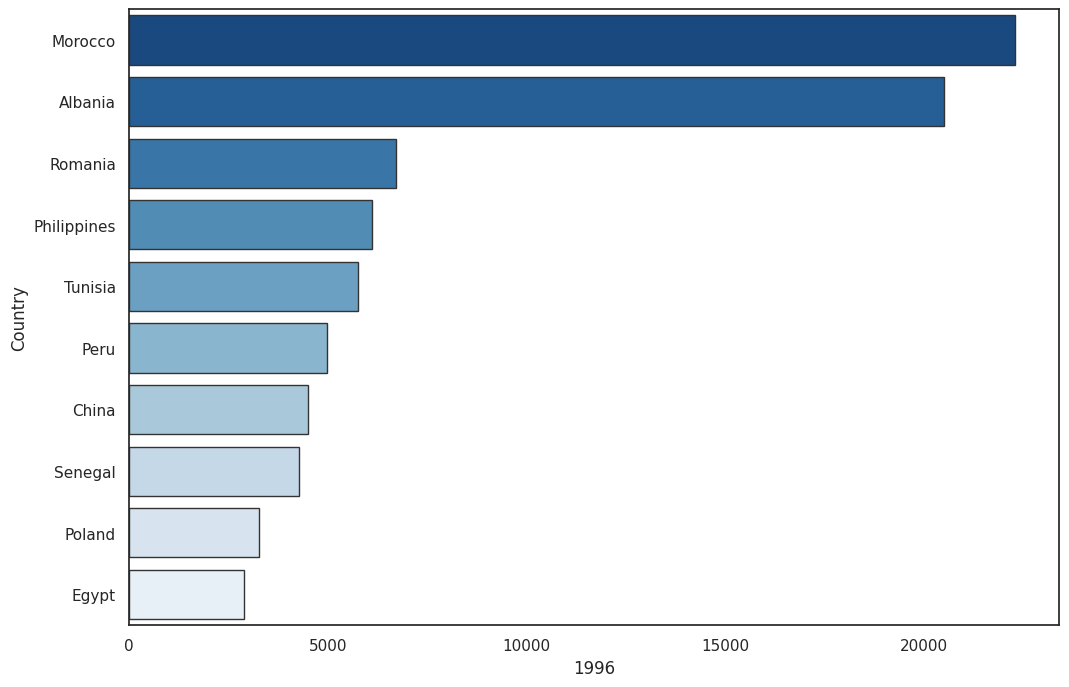

In [218]:
# let's see the main country of departure

year = int(input('give the year:  '))
plt.figure(figsize=(12,8))
sb.set(style="white")
df_sorted_year = df_sorted.sort_values(by=year, ascending=False)
sb.barplot(x=df_sorted_year[year].head(10), y=df_sorted_year['Country'].head(10),
            palette="Blues_r", edgecolor=".2");

In [219]:
top_10_year_input = df_sorted_year.head(10)
top_10_year_input

,Type,Coverage,Country,AreaName,RegName,DevName,1995,1996,1997,1998,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,Total
307,Immigrants,Foreigners,Morocco,Africa,Northern Africa,Developing regions,4937,22289,14957,12816,...,26057,21784,23483,37275,33128,29960,23885,19590,19568,446187
193,Immigrants,Foreigners,Albania,Europe,Southern Europe,Developed regions,3411,20508,15009,19813,...,28358,23099,23292,35715,27493,22591,16613,14118,12165,435426
332,Immigrants,Foreigners,Romania,Europe,Eastern Europe,Developed regions,2321,6701,6755,6818,...,45338,39715,271443,174554,105597,92116,90096,81666,58227,1172278
326,Immigrants,Foreigners,Philippines,Asia,South-Eastern Asia,Developing regions,2108,6110,8056,8832,...,5546,4428,3951,7849,9995,10745,10351,9893,7565,125759
368,Immigrants,Foreigners,Tunisia,Africa,Northern Africa,Developing regions,1146,5757,3348,2641,...,4915,4414,4512,6947,5692,6007,5888,5447,4313,97594
325,Immigrants,Foreigners,Peru,Latin America and the Caribbean,South America,Developing regions,957,4983,5709,4637,...,5402,4879,4451,7182,10421,12166,8686,5614,4338,110229
227,Immigrants,Foreigners,China,Asia,Eastern Asia,Developing regions,1448,4500,7305,0,...,14732,13579,9719,12791,16843,22866,20055,20463,17592,205332
342,Immigrants,Foreigners,Senegal,Africa,Western Africa,Developing regions,521,4276,3773,2161,...,2910,2280,2282,4770,4858,8851,6608,5493,6451,78893
327,Immigrants,Foreigners,Poland,Europe,Eastern Europe,Developed regions,1381,3262,3783,2738,...,10385,11791,19101,12314,9123,7174,5471,4618,3506,128481
244,Immigrants,Foreigners,Egypt,Africa,Northern Africa,Developing regions,740,2883,3186,2800,...,5584,5041,3726,5274,7977,9345,9572,8623,9754,107291


In [222]:
country_list = list(top_10_year_input['Country'])
total_list = list(top_10_year_input[year])

In [223]:
import plotly.express as px

# Sample data
data = {
    'Country': country_list,
    'Value': total_list
}

df = pd.DataFrame(data)

fig = px.choropleth(
    df,
    locations='Country',
    locationmode='country names',
    color='Value',
    color_continuous_scale='Viridis',
    range_color=(0, df['Value'].max()),
    labels={'Value': 'Value'},
    title='Top 10 Countries of Departure in '+ str(year)
)

fig.update_layout(
    geo=dict(showframe=False, showcoastlines=False),
    margin={"r": 0, "t": 30, "l": 0, "b": 0}
)

fig.show()



In [193]:
country_list_global = list(df_sorted['Country'])
total_list_global = list(df_sorted['Total'])

# plot the global countries per immigration
data = {
    'Country': country_list_global,
    'Value': total_list_global
}

df = pd.DataFrame(data)

fig = px.choropleth(
    df,
    locations='Country',
    locationmode='country names',
    color='Value',
    color_continuous_scale='Viridis',
    range_color=(0, df['Value'].max()),
    labels={'Value': 'Value'},
    title='Choropleth Map'
)


fig.update_layout(
    geo=dict(showframe=False, showcoastlines=False),
    margin={"r": 0, "t": 30, "l": 0, "b": 0}
)

fig.show()

In [226]:
'''import pandas as pd
import matplotlib.pyplot as plt

#Filter DataFrame for the desired year
year = int(input("Enter a year between 2002 and 2013: "))
df_year = italy_imm_data[['Country', (year)]]


#Sort countries based on the number of immigrants
df_year_sorted = df_year.sort_values(by=year, ascending=False)

#Select top 10 countries
top_10_countries = df_year_sorted.head(10)

# Step 5: Plot the results
plt.bar(top_10_countries['Country'], top_10_countries[year])
plt.xlabel('Country')
plt.ylabel('Number of Immigrants')
plt.title(f'Top 10 Countries with the Highest Number of Immigrants in {year}')
plt.xticks(rotation=90)
plt.show()'''


'import pandas as pd\nimport matplotlib.pyplot as plt\n\n#Filter DataFrame for the desired year\nyear = int(input("Enter a year between 2002 and 2013: "))\ndf_year = italy_imm_data[[\'Country\', (year)]]\n\n\n#Sort countries based on the number of immigrants\ndf_year_sorted = df_year.sort_values(by=year, ascending=False)\n\n#Select top 10 countries\ntop_10_countries = df_year_sorted.head(10)\n\n# Step 5: Plot the results\nplt.bar(top_10_countries[\'Country\'], top_10_countries[year])\nplt.xlabel(\'Country\')\nplt.ylabel(\'Number of Immigrants\')\nplt.title(f\'Top 10 Countries with the Highest Number of Immigrants in {year}\')\nplt.xticks(rotation=90)\nplt.show()'

In [227]:
'''fig, ax = plt.subplots(figsize=(10, 6))
top_10_year_df = df_year_sorted.head(10)
plt.barh(top_10_year_df['Country'], top_10_year_df[year])'''

"fig, ax = plt.subplots(figsize=(10, 6))\ntop_10_year_df = df_year_sorted.head(10)\nplt.barh(top_10_year_df['Country'], top_10_year_df[year])"

In [228]:
'''fig, ax = plt.subplots(figsize=(15, 8))
dff = top_10_year_df[::-1]
ax.barh(dff['Country'], dff[year])
for i, (value, name) in enumerate(zip( dff[year],dff['Country'])):

    ax.text(value, i,     value, ha='left')

ax.text(1, 0.4, year, transform=ax.transAxes, size=46, ha='right')'''

"fig, ax = plt.subplots(figsize=(15, 8))\ndff = top_10_year_df[::-1]\nax.barh(dff['Country'], dff[year])\nfor i, (value, name) in enumerate(zip( dff[year],dff['Country'])):\n\n    ax.text(value, i,     value, ha='left')\n\nax.text(1, 0.4, year, transform=ax.transAxes, size=46, ha='right')"

In [229]:
!pip install bar_chart_race

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [230]:
italy_imm_data.T

,192,193,194,195,196,197,198,199,200,201,...,376,377,378,379,380,381,382,383,384,385
Type,Immigrants,Immigrants,Immigrants,Immigrants,Immigrants,Immigrants,Immigrants,Immigrants,Immigrants,Immigrants,...,Immigrants,Immigrants,Immigrants,Immigrants,Immigrants,Immigrants,Immigrants,Immigrants,Immigrants,Immigrants
Coverage,Foreigners,Foreigners,Foreigners,Foreigners,Foreigners,Foreigners,Foreigners,Foreigners,Foreigners,Foreigners,...,Foreigners,Foreigners,Foreigners,Foreigners,Foreigners,Foreigners,Foreigners,Foreigners,Foreigners,Foreigners
Country,Afghanistan,Albania,Algeria,Andorra,Angola,Antigua and Barbuda,Argentina,Armenia,Australia,Austria,...,United Republic of Tanzania,United States of America,Uruguay,Uzbekistan,Vanuatu,Venezuela (Bolivarian Republic of),Viet Nam,Yemen,Zambia,Zimbabwe
AreaName,Asia,Europe,Africa,Europe,Africa,Latin America and the Caribbean,Latin America and the Caribbean,Asia,Oceania,Europe,...,Africa,Northern America,Latin America and the Caribbean,Asia,Oceania,Latin America and the Caribbean,Asia,Asia,Africa,Africa
RegName,Southern Asia,Southern Europe,Northern Africa,Southern Europe,Middle Africa,Caribbean,South America,Western Asia,Australia and New Zealand,Western Europe,...,Eastern Africa,Northern America,South America,Central Asia,Melanesia,South America,South-Eastern Asia,Western Asia,Eastern Africa,Eastern Africa
DevName,Developing regions,Developed regions,Developing regions,Developed regions,Developing regions,Developing regions,Developing regions,Developing regions,Developed regions,Developed regions,...,Developing regions,Developed regions,Developing regions,Developing regions,Developing regions,Developing regions,Developing regions,Developing regions,Developing regions,Developing regions
1995,0,3411,0,0,0,0,834,0,0,0,...,0,990,0,0,0,280,0,0,0,0
1996,0,20508,0,0,0,0,745,0,0,0,...,0,1173,0,0,0,384,0,0,0,0
1997,0,15009,0,0,0,0,594,0,0,0,...,0,1094,0,0,0,350,0,0,0,0
1998,93,19813,1234,5,104,0,528,15,187,427,...,57,1249,88,181,0,292,35,4,13,8


In [231]:
df = italy_imm_data.T
df = df.drop(df.index[:6])
df.columns = italy_imm_data['Country'].unique()
df

,Afghanistan,Albania,Algeria,Andorra,Angola,Antigua and Barbuda,Argentina,Armenia,Australia,Austria,...,United Republic of Tanzania,United States of America,Uruguay,Uzbekistan,Vanuatu,Venezuela (Bolivarian Republic of),Viet Nam,Yemen,Zambia,Zimbabwe
1995,0,3411,0,0,0,0,834,0,0,0,...,0,990,0,0,0,280,0,0,0,0
1996,0,20508,0,0,0,0,745,0,0,0,...,0,1173,0,0,0,384,0,0,0,0
1997,0,15009,0,0,0,0,594,0,0,0,...,0,1094,0,0,0,350,0,0,0,0
1998,93,19813,1234,5,104,0,528,15,187,427,...,57,1249,88,181,0,292,35,4,13,8
1999,105,28668,1425,7,108,2,564,26,145,377,...,46,1010,57,243,4,341,94,4,14,7
2000,34,31992,1380,6,109,0,717,30,205,412,...,67,1285,106,193,2,472,95,11,23,12
2002,48,24478,873,4,97,11,3907,32,203,337,...,55,1143,132,95,0,499,105,26,9,11
2003,50,49296,2517,7,114,12,5694,45,256,383,...,80,1359,337,176,0,1069,118,39,16,17
2004,64,38807,2892,15,98,13,4631,33,265,381,...,67,1310,401,131,1,828,58,26,19,68
2005,145,28358,1190,3,80,2,2746,49,290,366,...,64,1374,316,106,2,805,136,21,31,19


In [232]:
df = df.drop(df.index[-1:])

In [233]:
years = ['1995', '1996', '1997', '1998', '1999', '2000', '2002', '2003', '2004', '2005', '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013']

df['year'] = years
df

,Afghanistan,Albania,Algeria,Andorra,Angola,Antigua and Barbuda,Argentina,Armenia,Australia,Austria,...,United States of America,Uruguay,Uzbekistan,Vanuatu,Venezuela (Bolivarian Republic of),Viet Nam,Yemen,Zambia,Zimbabwe,year
1995,0,3411,0,0,0,0,834,0,0,0,...,990,0,0,0,280,0,0,0,0,1995
1996,0,20508,0,0,0,0,745,0,0,0,...,1173,0,0,0,384,0,0,0,0,1996
1997,0,15009,0,0,0,0,594,0,0,0,...,1094,0,0,0,350,0,0,0,0,1997
1998,93,19813,1234,5,104,0,528,15,187,427,...,1249,88,181,0,292,35,4,13,8,1998
1999,105,28668,1425,7,108,2,564,26,145,377,...,1010,57,243,4,341,94,4,14,7,1999
2000,34,31992,1380,6,109,0,717,30,205,412,...,1285,106,193,2,472,95,11,23,12,2000
2002,48,24478,873,4,97,11,3907,32,203,337,...,1143,132,95,0,499,105,26,9,11,2002
2003,50,49296,2517,7,114,12,5694,45,256,383,...,1359,337,176,0,1069,118,39,16,17,2003
2004,64,38807,2892,15,98,13,4631,33,265,381,...,1310,401,131,1,828,58,26,19,68,2004
2005,145,28358,1190,3,80,2,2746,49,290,366,...,1374,316,106,2,805,136,21,31,19,2005


In [234]:
df =  df.set_index('year')
df = df.astype(int)

In [235]:
import bar_chart_race as bcr
bcr.bar_chart_race(
    df = df,
    title = 'Number of immigrants arriving in Italy per Year',
    label_bars=True,
    n_bars = 10,
    orientation = 'h',
    cmap = 'prism',
    period_length=2000,
    fixed_max = True
)

/usr/local/lib/python3.10/dist-packages/bar_chart_race/_make_chart.py:284: UserWarning:

Glyph 127 () missing from current font.

/usr/local/lib/python3.10/dist-packages/bar_chart_race/_make_chart.py:284: UserWarning:

Glyph 128 (\x80) missing from current font.

/usr/local/lib/python3.10/dist-packages/bar_chart_race/_make_chart.py:284: UserWarning:

Glyph 129 (\x81) missing from current font.

/usr/local/lib/python3.10/dist-packages/bar_chart_race/_make_chart.py:284: UserWarning:

Glyph 130 (\x82) missing from current font.

/usr/local/lib/python3.10/dist-packages/bar_chart_race/_make_chart.py:284: UserWarning:

Glyph 131 (\x83) missing from current font.

/usr/local/lib/python3.10/dist-packages/bar_chart_race/_make_chart.py:284: UserWarning:

Glyph 132 (\x84) missing from current font.

/usr/local/lib/python3.10/dist-packages/bar_chart_race/_make_chart.py:284: UserWarning:

Glyph 133 (\x85) missing from current font.

/usr/local/lib/python3.10/dist-packages/bar_chart_race/_make_char

In [236]:
df_sum = df.T
df_sum

year,1995,1996,1997,1998,1999,2000,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013
Afghanistan,0,0,0,93,105,34,48,50,64,145,171,856,1175,1017,694,847,1109,1147
Albania,3411,20508,15009,19813,28668,31992,24478,49296,38807,28358,23099,23292,35715,27493,22591,16613,14118,12165
Algeria,0,0,0,1234,1425,1380,873,2517,2892,1190,976,920,1376,1132,1199,1089,944,935
Andorra,0,0,0,5,7,6,4,7,15,3,5,4,13,13,7,3,4,1
Angola,0,0,0,104,108,109,97,114,98,80,76,45,85,83,78,69,91,64
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Venezuela (Bolivarian Republic of),280,384,350,292,341,472,499,1069,828,805,627,790,848,704,802,738,584,528
Viet Nam,0,0,0,35,94,95,105,118,58,136,183,272,326,301,306,230,141,159
Yemen,0,0,0,4,4,11,26,39,26,21,24,19,26,26,18,16,8,21
Zambia,0,0,0,13,14,23,9,16,19,31,28,11,25,18,17,23,12,15


In [237]:
years_int = list(range(1996, 2001)) + list(range(2002, 2014))
for i in years_int:
  sum_year = []
  for j in range(len(df_sum)):
    if i != 2002:
      sum_year.append(df_sum[str(i-1)][j] + df_sum[str(i)][j])
    else:
      sum_year.append(df_sum[str(i-2)][j] + df_sum[str(i)][j])

  df_sum[str(i)] = sum_year

In [238]:
df_sum.T

,Afghanistan,Albania,Algeria,Andorra,Angola,Antigua and Barbuda,Argentina,Armenia,Australia,Austria,...,United Republic of Tanzania,United States of America,Uruguay,Uzbekistan,Vanuatu,Venezuela (Bolivarian Republic of),Viet Nam,Yemen,Zambia,Zimbabwe
year,,,,,,,,,,,,,,,,,,,,,
1995,0,3411,0,0,0,0,834,0,0,0,...,0,990,0,0,0,280,0,0,0,0
1996,0,23919,0,0,0,0,1579,0,0,0,...,0,2163,0,0,0,664,0,0,0,0
1997,0,38928,0,0,0,0,2173,0,0,0,...,0,3257,0,0,0,1014,0,0,0,0
1998,93,58741,1234,5,104,0,2701,15,187,427,...,57,4506,88,181,0,1306,35,4,13,8
1999,198,87409,2659,12,212,2,3265,41,332,804,...,103,5516,145,424,4,1647,129,8,27,15
2000,232,119401,4039,18,321,2,3982,71,537,1216,...,170,6801,251,617,6,2119,224,19,50,27
2002,280,143879,4912,22,418,13,7889,103,740,1553,...,225,7944,383,712,6,2618,329,45,59,38
2003,330,193175,7429,29,532,25,13583,148,996,1936,...,305,9303,720,888,6,3687,447,84,75,55
2004,394,231982,10321,44,630,38,18214,181,1261,2317,...,372,10613,1121,1019,7,4515,505,110,94,123


In [239]:
bcr.bar_chart_race(
    df = df_sum.T,
    title = 'Total number of immigrants arrived in Italy',
    label_bars=True,
    n_bars = 10,
    orientation = 'h',
    cmap = 'prism',
    period_length=2000,
    fixed_max = True
)

/usr/local/lib/python3.10/dist-packages/bar_chart_race/_make_chart.py:284: UserWarning:

Glyph 127 () missing from current font.

/usr/local/lib/python3.10/dist-packages/bar_chart_race/_make_chart.py:284: UserWarning:

Glyph 128 (\x80) missing from current font.

/usr/local/lib/python3.10/dist-packages/bar_chart_race/_make_chart.py:284: UserWarning:

Glyph 129 (\x81) missing from current font.

/usr/local/lib/python3.10/dist-packages/bar_chart_race/_make_chart.py:284: UserWarning:

Glyph 130 (\x82) missing from current font.

/usr/local/lib/python3.10/dist-packages/bar_chart_race/_make_chart.py:284: UserWarning:

Glyph 131 (\x83) missing from current font.

/usr/local/lib/python3.10/dist-packages/bar_chart_race/_make_chart.py:284: UserWarning:

Glyph 132 (\x84) missing from current font.

/usr/local/lib/python3.10/dist-packages/bar_chart_race/_make_chart.py:284: UserWarning:

Glyph 133 (\x85) missing from current font.

/usr/local/lib/python3.10/dist-packages/bar_chart_race/_make_char

In [240]:
def summary(values, ranks):
    total_deaths = int(round(values.sum(), -2))
    s = f'Total Immigrants - {total_deaths:,.0f}'
    return {'x': .99, 'y': .05, 's': s, 'ha': 'right', 'size': 8}

bcr.bar_chart_race(df_sum.T, period_summary_func=summary,    title = 'Total number of immigrants arrived in Italy',
    label_bars=True,
    n_bars = 10,
    orientation = 'h',
    cmap = 'prism',
    period_length=2000,
    fixed_max = True,
    #perpendicular_bar_func='mean'
                   )

/usr/local/lib/python3.10/dist-packages/bar_chart_race/_make_chart.py:284: UserWarning:

Glyph 127 () missing from current font.

/usr/local/lib/python3.10/dist-packages/bar_chart_race/_make_chart.py:284: UserWarning:

Glyph 128 (\x80) missing from current font.

/usr/local/lib/python3.10/dist-packages/bar_chart_race/_make_chart.py:284: UserWarning:

Glyph 129 (\x81) missing from current font.

/usr/local/lib/python3.10/dist-packages/bar_chart_race/_make_chart.py:284: UserWarning:

Glyph 130 (\x82) missing from current font.

/usr/local/lib/python3.10/dist-packages/bar_chart_race/_make_chart.py:284: UserWarning:

Glyph 131 (\x83) missing from current font.

/usr/local/lib/python3.10/dist-packages/bar_chart_race/_make_chart.py:284: UserWarning:

Glyph 132 (\x84) missing from current font.

/usr/local/lib/python3.10/dist-packages/bar_chart_race/_make_chart.py:284: UserWarning:

Glyph 133 (\x85) missing from current font.

/usr/local/lib/python3.10/dist-packages/bar_chart_race/_make_char

# Romania

In [244]:
romania_mask = df_sorted['Country'] == 'Romania'
romania_df = df_sorted[romania_mask]

romania_df

,Type,Coverage,Country,AreaName,RegName,DevName,1995,1996,1997,1998,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,Total
332,Immigrants,Foreigners,Romania,Europe,Eastern Europe,Developed regions,2321,6701,6755,6818,...,45338,39715,271443,174554,105597,92116,90096,81666,58227,1172278


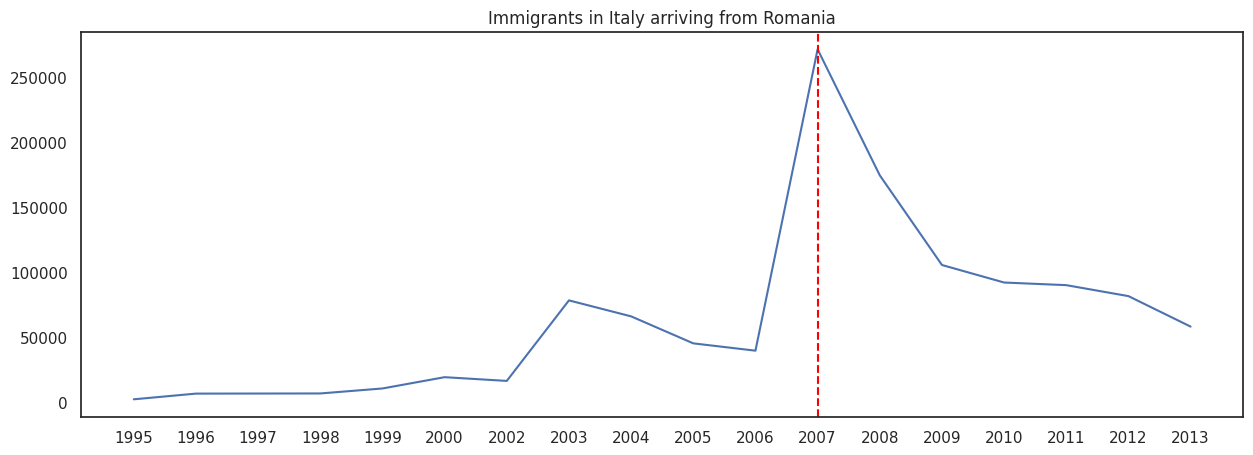

In [274]:
years = ['1995', '1996', '1997', '1998', '1999', '2000', '2002', '2003', '2004', '2005', '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013']

romania_data = []

for i in years:
  romania_data.append(romania_df[int(i)])

plt.figure(figsize=(15,5))
plt.plot(years, romania_data)
plt.title('Immigrants in Italy arriving from Romania')

plt.axvline(x='2007', color='red', linestyle='--')


In [ ]:
# remember 2007--> Romania becames part of the Europea Union

# Bulgaria

In [251]:
bulgaria_mask = df_sorted['Country'] == 'Bulgaria'
bulgaria_df = df_sorted[bulgaria_mask]

bulgaria_df

,Type,Coverage,Country,AreaName,RegName,DevName,1995,1996,1997,1998,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,Total
217,Immigrants,Foreigners,Bulgaria,Europe,Eastern Europe,Developed regions,0,0,0,965,...,2361,2145,13362,8436,6244,5877,5101,4794,3734,64663


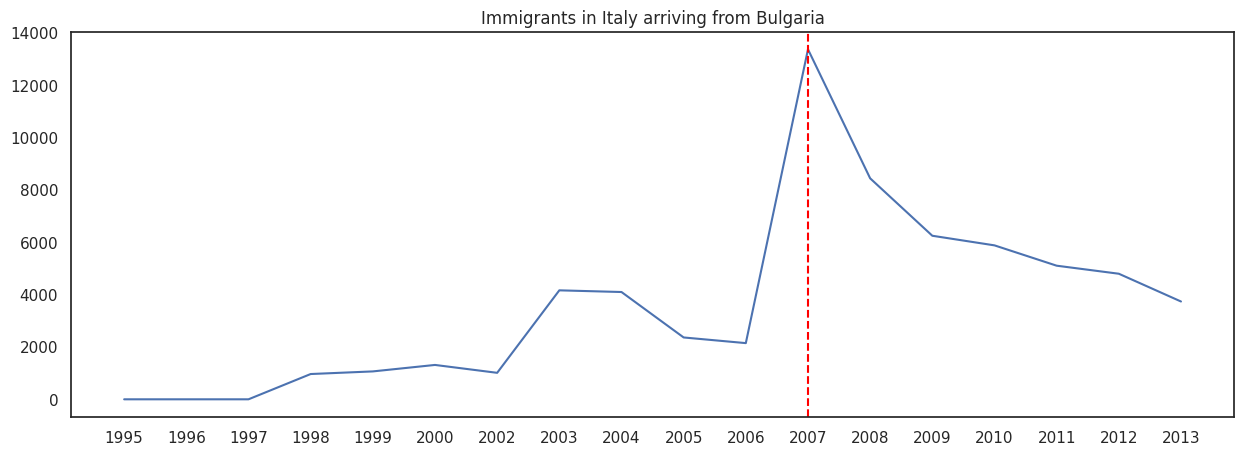

In [285]:
bulgaria_data = []

for i in years:
  bulgaria_data.append(bulgaria_df[int(i)])

plt.figure(figsize=(15,5))
plt.plot(years, bulgaria_data)
plt.title('Immigrants in Italy arriving from Bulgaria')
plt.axvline(x='2007', color='red', linestyle='--')


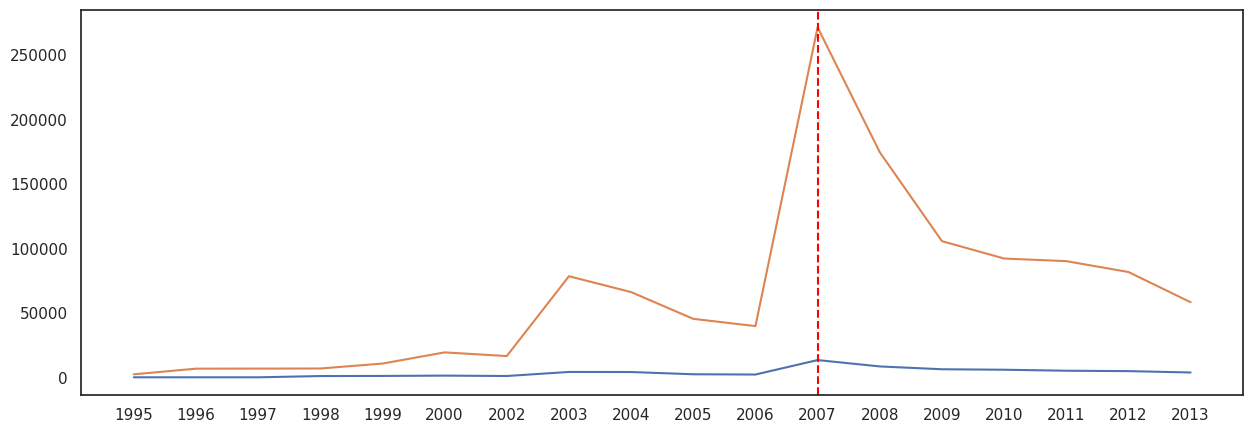

In [288]:
plt.figure(figsize=(15,5))
plt.plot(years, bulgaria_data)
plt.plot(years, romania_data)
plt.axvline(x='2007', color='red', linestyle='--')

# Albania

In [289]:
albania_mask = df_sorted['Country'] == 'Albania'
albania_df = df_sorted[albania_mask]

albania_df

,Type,Coverage,Country,AreaName,RegName,DevName,1995,1996,1997,1998,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,Total
193,Immigrants,Foreigners,Albania,Europe,Southern Europe,Developed regions,3411,20508,15009,19813,...,28358,23099,23292,35715,27493,22591,16613,14118,12165,435426


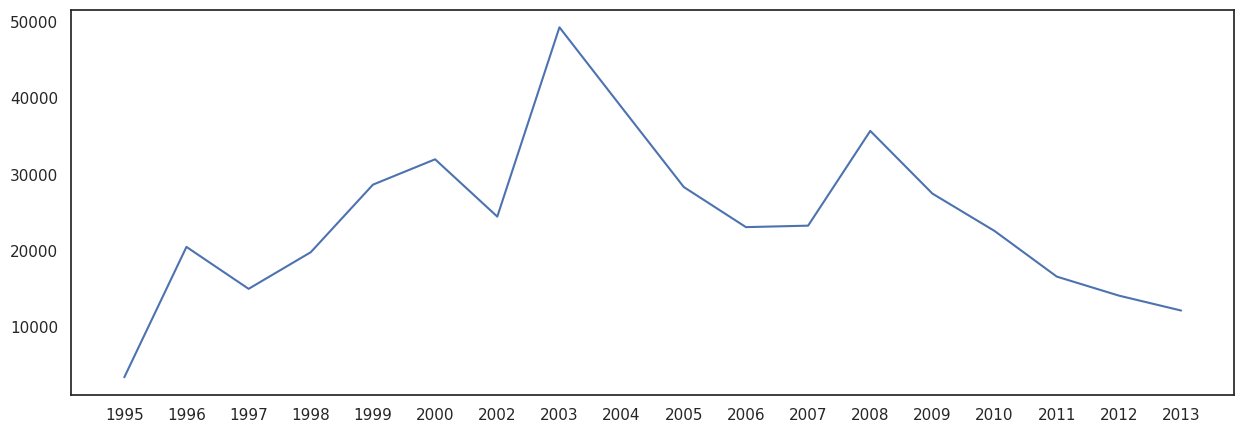

In [293]:
albania_data = []

for i in years:
  albania_data.append(albania_df[int(i)])

plt.figure(figsize=(15,5))
plt.plot(years, albania_data)

# IRAQ

In [ ]:
iraq_mask = df_sorted['Country'] == 'Iraq'
iraq_df = df_sorted[iraq_mask]

iraq_df

In [ ]:
iraq_data = []

for i in years:
  iraq_data.append(iraq_df[i])

plt.plot(years, iraq_data)

# Try Some models

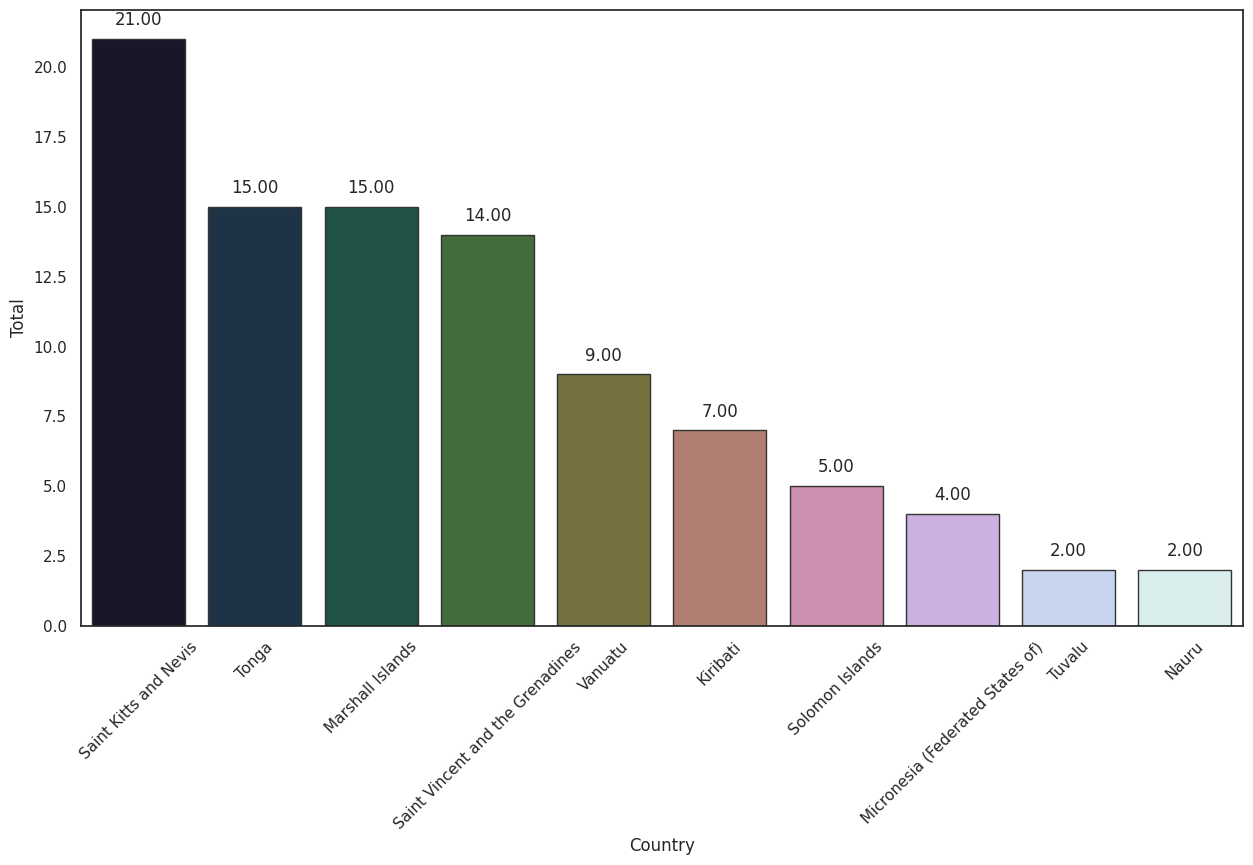

In [294]:
plt.figure(figsize=(15,8))
sb.set(style="white")
splot = sb.barplot(y=df_sorted.Total.tail(10), x=df_sorted.Country.tail(10),
            palette="cubehelix", edgecolor=".2");

for p in splot.patches:
  splot.annotate(format(p.get_height(), '.2f'), (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center', va = 'baseline', xytext = (0, 10), textcoords = 'offset points')

plt.xticks(rotation=45)

plt.show()

In [295]:
continents = italy_imm_data.groupby('AreaName', axis=0).sum()
print(type(italy_imm_data.groupby('AreaName', axis=0)))
continents.head()

<class 'pandas.core.groupby.generic.DataFrameGroupBy'>


<ipython-input-295-a0377acab178>:1: FutureWarning:

The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.



,1995,1996,1997,1998,1999,2000,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,Total
AreaName,,,,,,,,,,,,,,,,,,,
Africa,7873,39708,31042,29232,40095,46795,33290,81702,77176,54321,47662,49751,75831,72361,75669,64283,65025,62821,1002085
Asia,6546,18526,27024,22877,18990,26511,33355,51724,64226,49395,43262,39893,62876,71412,88241,77526,77216,71167,851601
Europe,17122,39599,35024,49804,64897,83940,70937,233395,195324,136906,125072,392058,314368,220566,215463,174873,148946,119884,2657205
Latin America and the Caribbean,4444,9918,9730,13062,15036,19081,19062,50243,49319,34632,31220,31617,40877,40276,42955,32577,25347,20857,502382
Northern America,1191,1382,1261,1467,1205,1485,1375,1594,1569,1642,1602,1517,1753,1731,1778,1858,1872,1755,33842


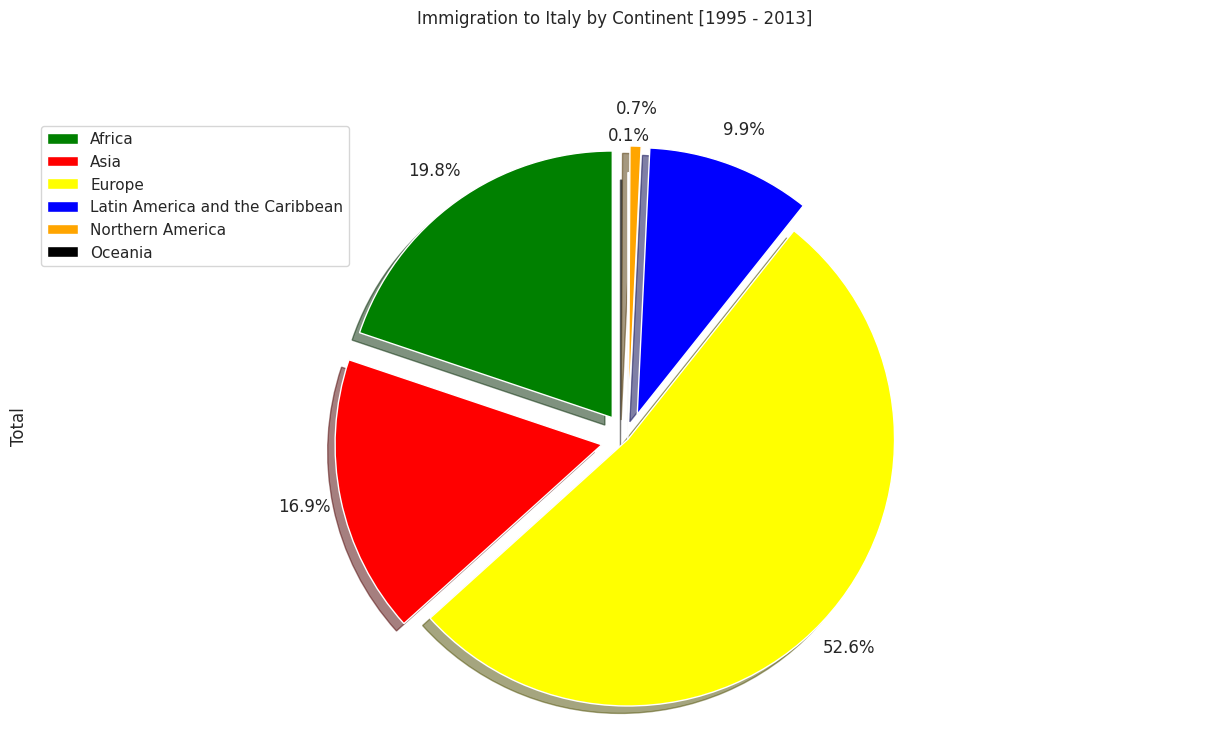

In [302]:
colors_list = ['green', 'red', 'yellow', 'blue', 'orange', 'black']
explode_list = [0.1, 0.1, 0, 0.1, 0.1, 0]

continents['Total'].plot(kind='pie',
                           figsize=(15, 8),
                           autopct='%1.1f%%',
                           startangle=90,
                           shadow=True,
                           labels=None,
                           pctdistance=1.14,
                           colors=colors_list,
                           explode=explode_list
                           )

plt.title('Immigration to Italy by Continent [1995 - 2013]', y=1.14)
plt.axis('equal')

plt.legend(labels=continents.index, loc='upper left')

plt.show()

In [304]:
years_int = list(range(1996, 2001)) + list(range(2002, 2014))
tot = pd.DataFrame(italy_imm_data[years_int].sum(axis=0))
tot.index = map(int, tot.index)
tot.reset_index(inplace = True)
tot.columns = ['year', 'total']
tot

,year,total
0,1996,109133
1,1997,104081
2,1998,116658
3,1999,140425
4,2000,178059
5,2002,158274
6,2003,418971
7,2004,387936
8,2005,277230
9,2006,249134


Text(0, 0.5, 'Number of Immigrants')

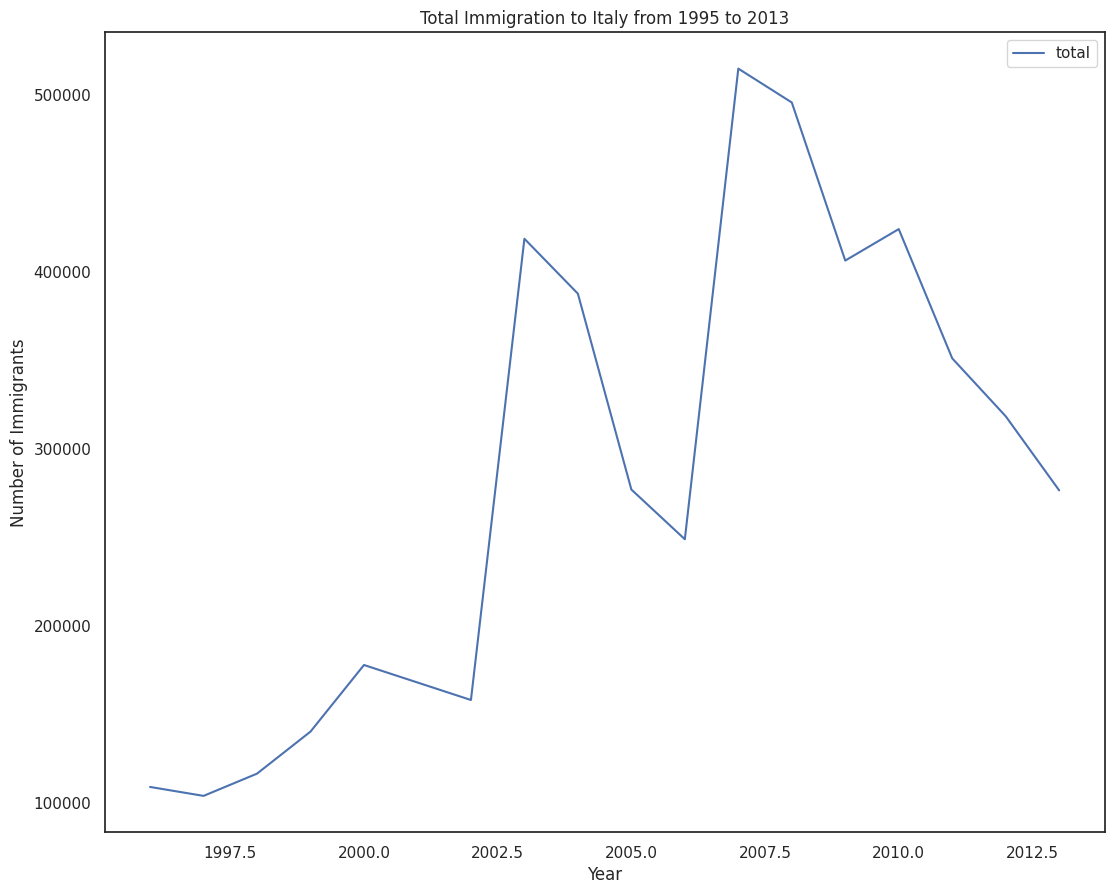

In [308]:
fig = plt.figure(figsize=(10,8))
ax = fig.add_axes([1,1,1,1])
tot.plot( x='year', y='total', ax=ax)

ax.set_title('Total Immigration to Italy from 1995 to 2013')
ax.set_xlabel('Year')
ax.set_ylabel('Number of Immigrants')

In [309]:
x = tot['year']
y = tot['total']
fit = np.polyfit(x, y, deg=1)
fit

array([ 1.79284804e+04, -3.56513944e+07])

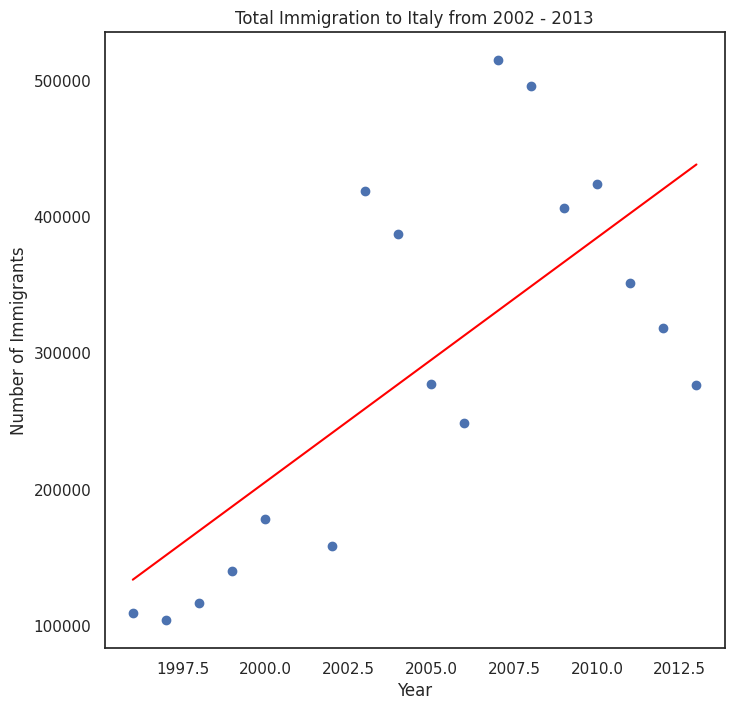

In [311]:
# Assuming you have a DataFrame named 'tot' with columns 'year' and 'total'
plt.figure(figsize=(8, 8))
plt.scatter(tot['year'], tot['total'])
plt.title('Total Immigration to Italy from 2002 - 2013')
plt.xlabel('Year')
plt.ylabel('Number of Immigrants')

# Assuming you have defined 'x' and 'fit' appropriately
plt.plot(x, fit[0] * x + fit[1], color='red')

plt.show()


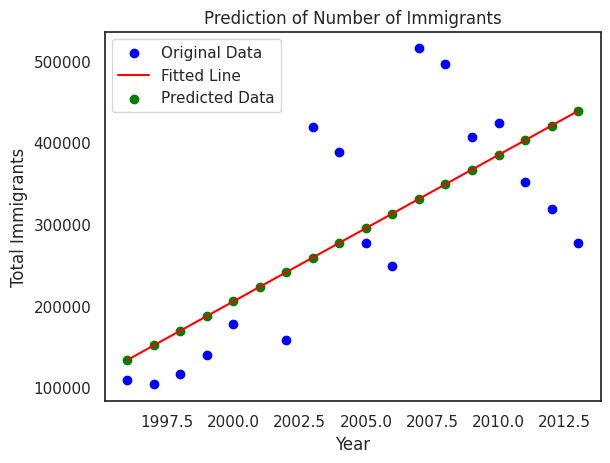

In [313]:
import numpy as np
import matplotlib.pyplot as plt

x = tot['year']
y = tot['total']

fit = np.polyfit(x, y, deg=1)

# Generate x values for prediction (next years)
x_pred = np.arange(min(x), max(x) + 1)

# Predict the corresponding y values using the fitted line
y_pred = fit[0] * x_pred + fit[1]

# Plot the original data points
plt.scatter(x, y, color='blue', label='Original Data')

# Plot the fitted line
plt.plot(x_pred, y_pred, color='red', label='Fitted Line')

# Plot the predicted values for next years
plt.scatter(x_pred, y_pred, color='green', label='Predicted Data')

plt.title('Prediction of Number of Immigrants')
plt.xlabel('Year')
plt.ylabel('Total Immigrants')
plt.legend()
plt.show()


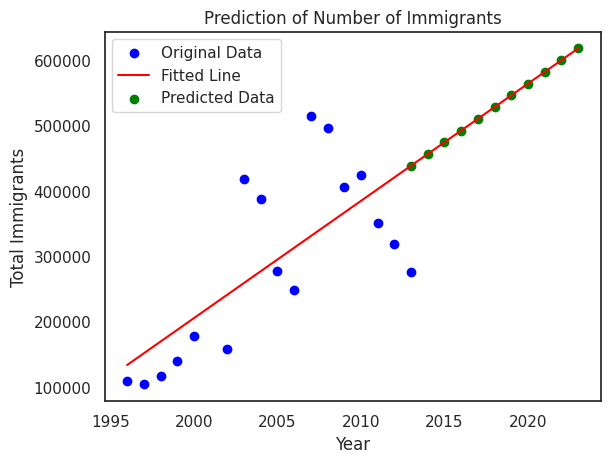

In [314]:
import numpy as np
import matplotlib.pyplot as plt

x = tot['year']
y = tot['total']

fit = np.polyfit(x, y, deg=1)

# Generate x values for prediction (including future years)
x_pred = np.arange(min(x), max(x) + 11)  # Extend by 10 years

# Predict the corresponding y values using the fitted line
y_pred = fit[0] * x_pred + fit[1]

# Plot the original data points
plt.scatter(x, y, color='blue', label='Original Data')

# Plot the fitted line
plt.plot(x_pred, y_pred, color='red', label='Fitted Line')

# Plot the predicted values for future years
plt.scatter(x_pred[-11:], y_pred[-11:], color='green', label='Predicted Data')

plt.title('Prediction of Number of Immigrants')
plt.xlabel('Year')
plt.ylabel('Total Immigrants')
plt.legend()
plt.show()
